# EXERCISE 14

Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
np.unique(df['HeartDisease'])

array([0, 1], dtype=int64)

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Handling Outliers
Now, lets remove some outliers, one way we can do it is by checking or filtering out outliers that significantly differ from the rest of the dataset, to do this u can check by filtering out the rows for each column where the values are greater than 3 standard deviations above the mean.

<hr>
<h4>Mean :</h4> The mean value is the average value
<h4>Standard Deviation :</h4> 
1. Standard deviation is a number that describes how spread out the values are.<br>
2. A low standard deviation means that most of the numbers are close to the mean (average) value.<br>
3. A high standard deviation means that the values are spread out over a wider range.
<hr>
For example, lets take the Cholesterol column, this column <b>Mean is 198</b> and <b>Standard Deviation is 109</b> as seen above, now we can filter out the rows that are three times the standard deviation above the mean by doing

<code>mean + 3 * std</code>

which is <code>198 + 3 * 109 = 525</code>

So any rows above 525 Cholesterol is an outliers since its 3 times above the mean of the column

Below is how you do it

In [20]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


As we can see above that there are 3 rows which are 3 times std above the mean, means above 525.

Now, lets check the shape of our entire Dataframe first

In [11]:
df.shape

(918, 12)

You can see we have 918 rows, now lets only take rows from the Dataframe where the Cholesterol value is below 525 and store it in a new Dataframe called **df1**

In [21]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

As seen above now in **df1** Dataframe we have 915 rows since other 3 are outliers as seen previously.

Now, we can do the same thing for the rest of the columns, we will check which other numeric columns have outliers that are 3 times std above the mean and then store the non-outliers in new dataframe 

In [27]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


As seen above, there are no outliers in the MaxHR column, so lets check another column

In [28]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Even the FastingBS column has no outliers

In [29]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


We can see that the Oldpeak column has 6 outliers, so lets store the rows which are not outliers in another dataframe

In [30]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

We stored it in **df2** now and u can see we have 909 rows now from 915 since 6 of them were outliers.

Lets do the same with other columns quickly!

In [34]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [35]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

# Handling Text Columns

Now since we have a new dataframe called **df3** where we removed all the outliers from 3 columns,

Now, we can try to handle the Text columns such as Sex, CHestPainType, RestingECG, ExerciseAngina and ST_Slope.

First we will check unique values from ChestPainType, RestingECG, ExerciseAngina and ST_Slope and then do **Label Encoding**

In [36]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

We can see ChestPainType column has 4 unique values, and they are **Nominal Variables** where the categories doesn't have any numeric ordering between each other like male,female or apple,banana,kiwi so its not a good idea to use **Label Encoding** here, we will just use **Dummy Variable** on it later

In [37]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

We can see above that the **RestingECG** column has 3 unique values and its an **Ordinal Variables**  where the categories have some sort of numerical ordering between them, so we can use **Label Encoding** for this

In [38]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

**ExerciseAngina** column has N or Y value which is also an **Ordinal Variables** so we can use **Label Encoding**

In [39]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

The **ST_Slope** is also an **Ordinal Variables** meaning we can do **Label Encoding** here as well.

So we will perform **Label Encoding** on **RestingECG, ExerciseAngina, ST_Slope** columns

### Label Encoding
First we will copy all the data in **df3** to a new Dataframe called **df4**

In [40]:
df4 = df3.copy()

In [41]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Now, we will do **Label Encoding** as below where we just replace the value with 0,1,2 or 3 as below

In [42]:
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True
)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True
)

In [43]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


Now we can see above that we have done **Label Encoding** on **RestingECG, ExerciseAngina, ST_Slope** columns.

Now, we are left with only two Text columns which are **Sex** and **ChestPainType** which were **Nominal Variables** so doing **Label Encoding** on them were not a good idea, so hence, we will perform **Dummy Variable** here and store it in another Dataframe again called **df5**

In [114]:
df5 = pd.get_dummies(df4, drop_first=True).astype(int)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0,3,0,1,0,1,0


# X and y splitting

In [48]:
X = df5.drop('HeartDisease', axis=1)
y = df5['HeartDisease']

# Scaling

### Standard Scaling

In [50]:
scale = StandardScaler()

In [55]:
X_scaled = scale.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

### MinMax Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X)
X_minmax

array([[0.24489796, 0.75675676, 0.55791506, ..., 1.        , 0.        ,
        0.        ],
       [0.42857143, 0.86486486, 0.34749035, ..., 0.        , 1.        ,
        0.        ],
       [0.18367347, 0.7027027 , 0.54633205, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.59183673, 0.7027027 , 0.25289575, ..., 0.        , 0.        ,
        0.        ],
       [0.59183673, 0.7027027 , 0.45559846, ..., 1.        , 0.        ,
        0.        ],
       [0.20408163, 0.74594595, 0.33783784, ..., 0.        , 1.        ,
        0.        ]])

# Train Test Splitting

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

# GridSearchCV

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [205]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy'],
        }
    }, 
    'k_neighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3, 5, 7, 10]
        }
    }
}

In [206]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [207]:
newdf = pd.DataFrame(scores,columns=['model','best_score','best_params'])
newdf

,model,best_score,best_params
0,svm,0.861293,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.843266,{'n_estimators': 10}
2,logistic_regression,0.851600,{'C': 5}
3,decision_tree,0.805795,{'criterion': 'gini'}
4,k_neighbors,0.865489,{'n_neighbors': 7}


In [208]:
clf.best_score_

0.8654885057471265

In [209]:
clf.best_params_

{'n_neighbors': 7}

In [210]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_scaled, y))

0.8347636586863105

In [211]:
clf.predict(X_test)
clf.score(X_test, y_test)

0.850828729281768

# PCA

In [212]:
pca = PCA(0.95)

In [213]:
X_pca = pca.fit_transform(X_scaled)

In [214]:
X_pca.shape

(902, 12)

In [215]:
pca.explained_variance_ratio_

array([0.21920836, 0.11003629, 0.0988713 , 0.09177081, 0.0820894 ,
       0.06946019, 0.06694035, 0.06332667, 0.04874315, 0.04616084,
       0.0383647 , 0.03395929])

In [216]:
pca.n_components_

12

# Train Test split on PCA

In [217]:
X_trainpca, X_testpca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

# MODEL

In [218]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_trainpca, y_train)
model.score(X_testpca, y_test)

0.850828729281768

In [219]:
newclf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors' : [3, 5, 7, 10]
}, cv=5, return_train_score=False)
newclf.fit(X_trainpca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]})

In [220]:
pd.DataFrame(newclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006456,0.003552,0.009569,0.005712,3,{'n_neighbors': 3},0.882759,0.861111,0.861111,0.840278,0.847222,0.858496,0.014570,3
1,0.000791,0.001147,0.015860,0.001698,5,{'n_neighbors': 5},0.868966,0.875000,0.875000,0.847222,0.868056,0.866849,0.010237,1
2,0.006293,0.007731,0.014113,0.005574,7,{'n_neighbors': 7},0.848276,0.861111,0.868056,0.847222,0.847222,0.854377,0.008626,4
3,0.006313,0.007773,0.020163,0.006699,10,{'n_neighbors': 10},0.855172,0.854167,0.881944,0.854167,0.847222,0.858534,0.012045,2


In [222]:
predict = newclf.predict(X_testpca)
newclf.score(X_testpca, y_test)

0.8453038674033149

In [238]:
X_pca[3]

array([ 0.74543134, -0.72939153, -1.10432788, -0.77106847, -0.3270782 ,
        0.64017202,  1.81247202, -0.39242212, -1.31430994, -0.48644066,
        0.14454911,  0.28330645])

In [237]:
y[3]

1

In [242]:
predict

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1])

In [244]:
y_test

604    0
290    0
255    0
151    0
223    0
      ..
53     0
724    0
506    1
589    1
312    1
Name: HeartDisease, Length: 181, dtype: int32

Text(95.72222222222221, 0.5, 'Truth')

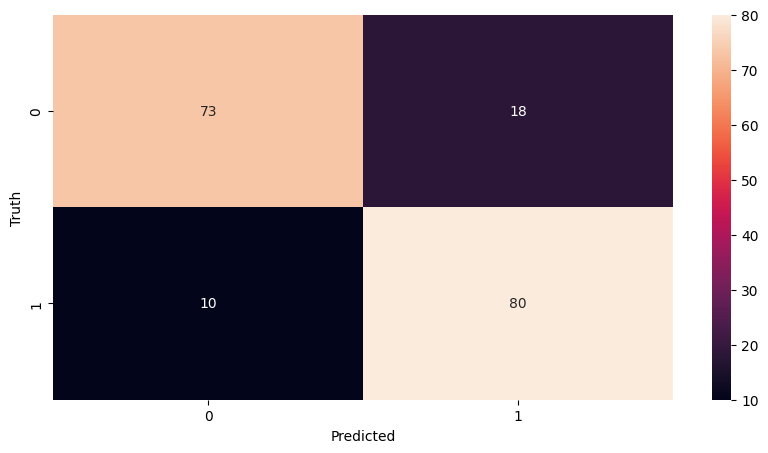

In [246]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10, 5))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")